In [1]:
# .Importing libs
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("london_merged.csv")
print(df.shape)
df.head()

(17414, 11)


,date,time,Count of bike shares,real temp,temperature feels like,humidity,wind_speed,weather_code,is_holiday,is_weekend,season
0,04-01-2015,12.00.00 AM,182,3.0,2.0,93.0,6.0,Broken Clouds,No,Yes,Winter
1,04-01-2015,1.00.00 AM,138,3.0,2.5,93.0,5.0,Clear,No,Yes,Winter
2,04-01-2015,2.00.00 AM,134,2.5,2.5,96.5,0.0,Clear,No,Yes,Winter
3,04-01-2015,3.00.00 AM,72,2.0,2.0,100.0,0.0,Clear,No,Yes,Winter
4,04-01-2015,4.00.00 AM,47,2.0,0.0,93.0,6.5,Clear,No,Yes,Winter


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17414 entries, 0 to 17413
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   date                    17414 non-null  object 
 1   time                    17414 non-null  object 
 2   Count of bike shares    17414 non-null  int64  
 3   real temp               17414 non-null  float64
 4   temperature feels like  17414 non-null  float64
 5   humidity                17414 non-null  float64
 6   wind_speed              17414 non-null  float64
 7   weather_code            17414 non-null  object 
 8   is_holiday              17414 non-null  object 
 9   is_weekend              17414 non-null  object 
 10  season                  17414 non-null  object 
dtypes: float64(4), int64(1), object(6)
memory usage: 1.5+ MB


In [4]:
df.head()

,date,time,Count of bike shares,real temp,temperature feels like,humidity,wind_speed,weather_code,is_holiday,is_weekend,season
0,04-01-2015,12.00.00 AM,182,3.0,2.0,93.0,6.0,Broken Clouds,No,Yes,Winter
1,04-01-2015,1.00.00 AM,138,3.0,2.5,93.0,5.0,Clear,No,Yes,Winter
2,04-01-2015,2.00.00 AM,134,2.5,2.5,96.5,0.0,Clear,No,Yes,Winter
3,04-01-2015,3.00.00 AM,72,2.0,2.0,100.0,0.0,Clear,No,Yes,Winter
4,04-01-2015,4.00.00 AM,47,2.0,0.0,93.0,6.5,Clear,No,Yes,Winter


In [5]:
df.isnull().sum()
# No null values detected

date                      0
time                      0
Count of bike shares      0
real temp                 0
temperature feels like    0
humidity                  0
wind_speed                0
weather_code              0
is_holiday                0
is_weekend                0
season                    0
dtype: int64

In [6]:
# Converting the datatype of date to datetime64[ns]
from datetime import datetime
df['date'] = pd.to_datetime(df['date'], format='%d-%m-%Y', errors='coerce')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17414 entries, 0 to 17413
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   date                    17414 non-null  datetime64[ns]
 1   time                    17414 non-null  object        
 2   Count of bike shares    17414 non-null  int64         
 3   real temp               17414 non-null  float64       
 4   temperature feels like  17414 non-null  float64       
 5   humidity                17414 non-null  float64       
 6   wind_speed              17414 non-null  float64       
 7   weather_code            17414 non-null  object        
 8   is_holiday              17414 non-null  object        
 9   is_weekend              17414 non-null  object        
 10  season                  17414 non-null  object        
dtypes: datetime64[ns](1), float64(4), int64(1), object(5)
memory usage: 1.5+ MB


In [11]:
round(df.describe(), 2)

,date,Count of bike shares,real temp,temperature feels like,humidity,wind_speed
count,17414,17414.00,17414.00,17414.00,17414.00,17414.00
mean,2016-01-03 11:00:12.817273344,1143.10,12.47,11.52,72.32,15.91
min,2015-01-04 00:00:00,0.00,-1.50,-6.00,20.50,0.00
25%,2015-07-04 00:00:00,257.00,8.00,6.00,63.00,10.00
50%,2016-01-03 00:00:00,844.00,12.50,12.50,74.50,15.00
75%,2016-07-04 00:00:00,1671.75,16.00,16.00,83.00,20.50
max,2017-01-03 00:00:00,7860.00,34.00,34.00,100.00,56.50
std,NaN,1085.11,5.57,6.62,14.31,7.89


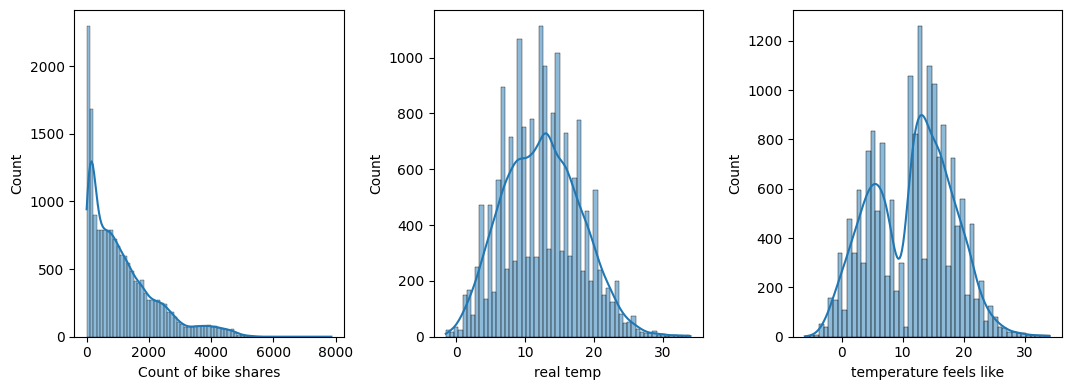

In [ ]:
plt.figure(figsize=(18,4))

# Count of bikes shares have highly right skewed data distrubtion, 
# But it is suggesting me to keep coz those values might indicate the data of pear hours
plt.subplot(1, 5, 1)
sns.histplot(df['Count of bike shares'], kde=True)

# Real Temp - it's normal distribution. And there are very few Outliers
plt.subplot(1, 5, 2)
sns.histplot(df['real temp'], kde=True)

# Temperature Feels - it is a normal distribution. And there are very few Outlier
plt.subplot(1, 5, 3)
sns.histplot(df['temperature feels like'], kde=True)

plt.tight_layout()
plt.show()

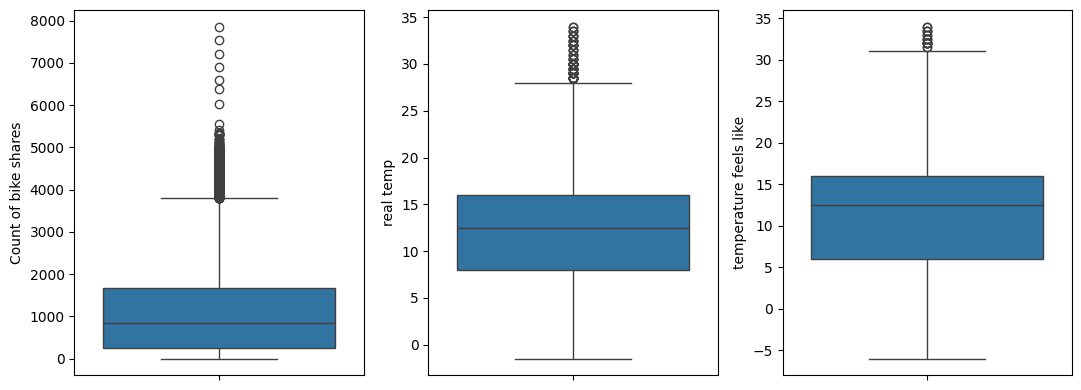

In [13]:
# Visualizing outliers using boxplot

plt.figure(figsize=(18,4))

plt.subplot(1, 5, 1)
sns.boxplot(df['Count of bike shares'])

plt.subplot(1, 5, 2)
sns.boxplot(df['real temp'])

plt.subplot(1, 5, 3)
sns.boxplot(df['temperature feels like'])

plt.tight_layout()
plt.show()

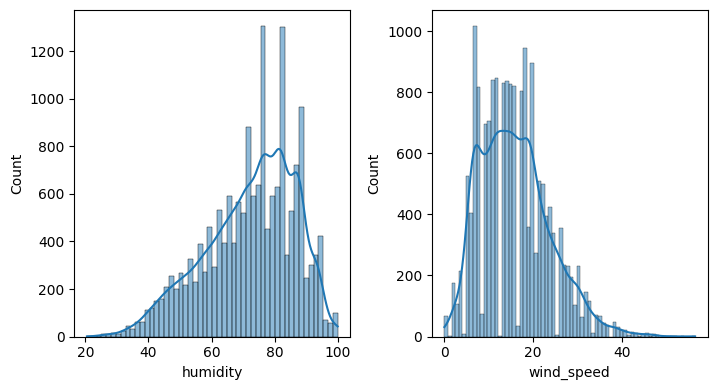

In [14]:
plt.figure(figsize=(18,4))

# Humidity data distribution is right skewed distribution (Around 70% + data is right skewed)
plt.subplot(1, 5, 1)
sns.histplot(df['humidity'], kde=True)

# Wind speed is slightly right skewed distribution
plt.subplot(1, 5, 2)
sns.histplot(df['wind_speed'], kde=True)

plt.tight_layout()
plt.show()

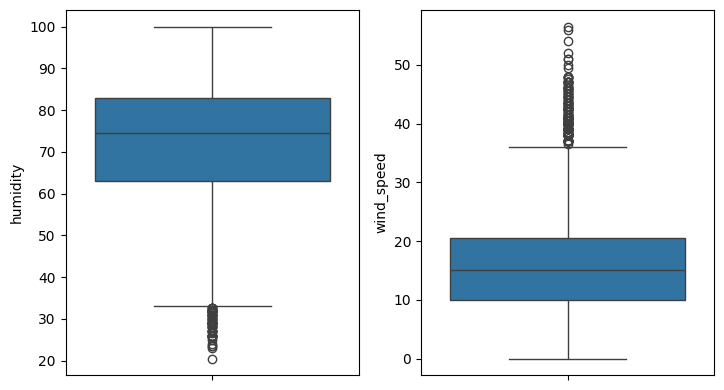

In [15]:
# Visualizing outliers using boxplot

plt.figure(figsize=(18,4))

plt.subplot(1, 5, 1)
sns.boxplot(df['humidity'])

plt.subplot(1, 5, 2)
sns.boxplot(df['wind_speed'])

plt.tight_layout()
plt.show()

In [16]:
# Assuming the outlier threshold using boxplot

print("Humidity :", df[df['humidity'] < 34].value_counts().sum())
print("Wind Speed :", df[df['wind_speed'] > 36 ].value_counts().sum())

Humidity : 90
Wind Speed : 236


In [17]:
CleanDf = df[(df['humidity'] >= 32) & (df['wind_speed'] <= 40)]

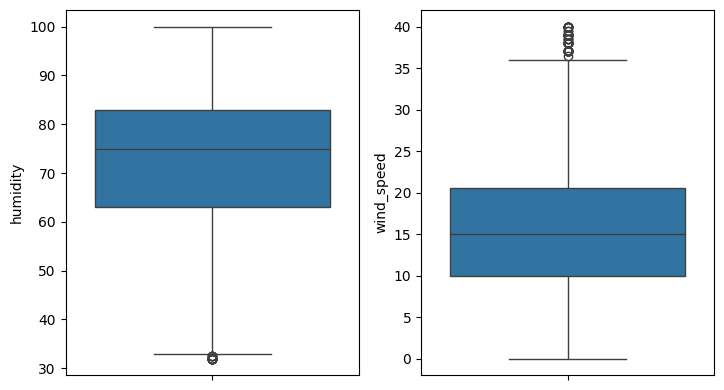

In [18]:
# Condition of Outliers after, applying the threeshold of the outliers

plt.figure(figsize=(18,4))

plt.subplot(1, 5, 1)
sns.boxplot(CleanDf['humidity'])

plt.subplot(1, 5, 2)
sns.boxplot(CleanDf['wind_speed'])

plt.tight_layout()
plt.show()

In [19]:
# Using IQR (Interquartile Range) method on main df, for outlier removal

def remove_outliers_iqr(df, column):
    Q1 = CleanDf[column].quantile(0.25)
    Q3 = CleanDf[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return CleanDf[(CleanDf[column] >= lower_bound) & (CleanDf[column] <= upper_bound)]


In [20]:
CleanDf = remove_outliers_iqr(df, 'humidity')
CleanDf = remove_outliers_iqr(df, 'wind_speed')

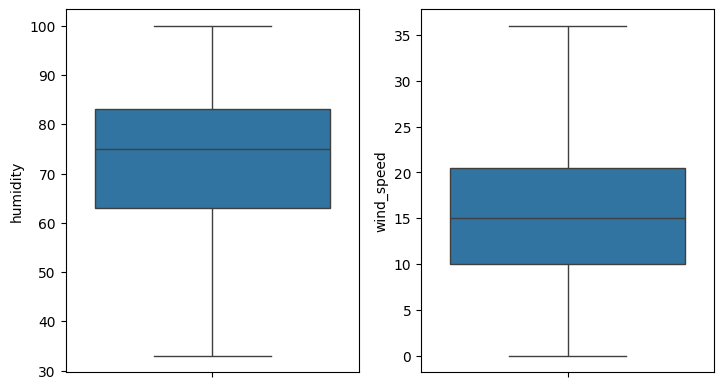

In [21]:
# Complete outliers removed

plt.figure(figsize=(18,4))

plt.subplot(1, 5, 1)
sns.boxplot(CleanDf['humidity'])

plt.subplot(1, 5, 2)
sns.boxplot(CleanDf['wind_speed'])

plt.tight_layout()
plt.show()

In [22]:
print(CleanDf.shape)
round(CleanDf.describe(),2)

(17107, 11)


,date,Count of bike shares,real temp,temperature feels like,humidity,wind_speed
count,17107,17107.00,17107.00,17107.00,17107.00,17107.00
mean,2016-01-05 03:10:39.527678720,1139.51,12.43,11.49,72.59,15.57
min,2015-01-04 00:00:00,0.00,-1.50,-6.00,33.00,0.00
25%,2015-07-06 00:00:00,250.00,8.00,6.00,63.00,10.00
50%,2016-01-05 00:00:00,840.00,12.50,12.50,75.00,15.00
75%,2016-07-06 00:00:00,1668.00,16.00,16.00,83.00,20.50
max,2017-01-03 00:00:00,7531.00,34.00,34.00,100.00,36.00
std,NaN,1082.97,5.56,6.61,14.08,7.38


In [23]:
df.shape

(17414, 11)

In [24]:
CleanDf['month name'] = CleanDf['date'].dt.month_name()
CleanDf['day_name'] = CleanDf['date'].dt.day_name()
CleanDf['Year'] = CleanDf['date'].dt.year

In [25]:
CleanDf.head(5)

,date,time,Count of bike shares,real temp,temperature feels like,humidity,wind_speed,weather_code,is_holiday,is_weekend,season,month name,day_name,Year
0,2015-01-04,12.00.00 AM,182,3.0,2.0,93.0,6.0,Broken Clouds,No,Yes,Winter,January,Sunday,2015
1,2015-01-04,1.00.00 AM,138,3.0,2.5,93.0,5.0,Clear,No,Yes,Winter,January,Sunday,2015
2,2015-01-04,2.00.00 AM,134,2.5,2.5,96.5,0.0,Clear,No,Yes,Winter,January,Sunday,2015
3,2015-01-04,3.00.00 AM,72,2.0,2.0,100.0,0.0,Clear,No,Yes,Winter,January,Sunday,2015
4,2015-01-04,4.00.00 AM,47,2.0,0.0,93.0,6.5,Clear,No,Yes,Winter,January,Sunday,2015


In [26]:
print(CleanDf['day_name'].unique())
print(CleanDf['Year'].unique())

['Sunday' 'Monday' 'Tuesday' 'Wednesday' 'Thursday' 'Friday' 'Saturday']
[2015 2016 2017]


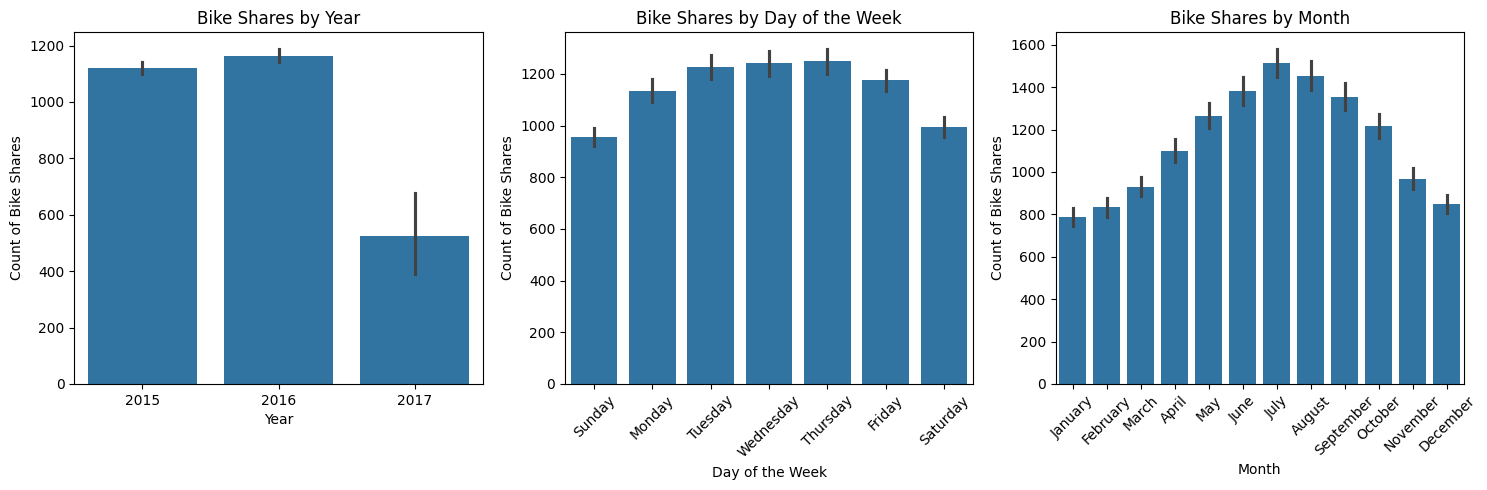

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5)) 


sns.barplot(x='Year', y='Count of bike shares', data=CleanDf, ax=axes[0])
axes[0].set_title('Bike Shares by Year')
axes[0].set_xlabel('Year')
axes[0].set_ylabel('Count of Bike Shares')
axes[0].tick_params(axis='x', rotation=0)


sns.barplot(x='day_name', y='Count of bike shares', data=CleanDf, ax=axes[1])
axes[1].set_title('Bike Shares by Day of the Week')
axes[1].set_xlabel('Day of the Week')
axes[1].set_ylabel('Count of Bike Shares')
axes[1].tick_params(axis='x', rotation=45)

sns.barplot(x='month name', y='Count of bike shares', data=CleanDf, ax=axes[2])
axes[2].set_title('Bike Shares by Month')
axes[2].set_xlabel('Month')
axes[2].set_ylabel('Count of Bike Shares')
axes[2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

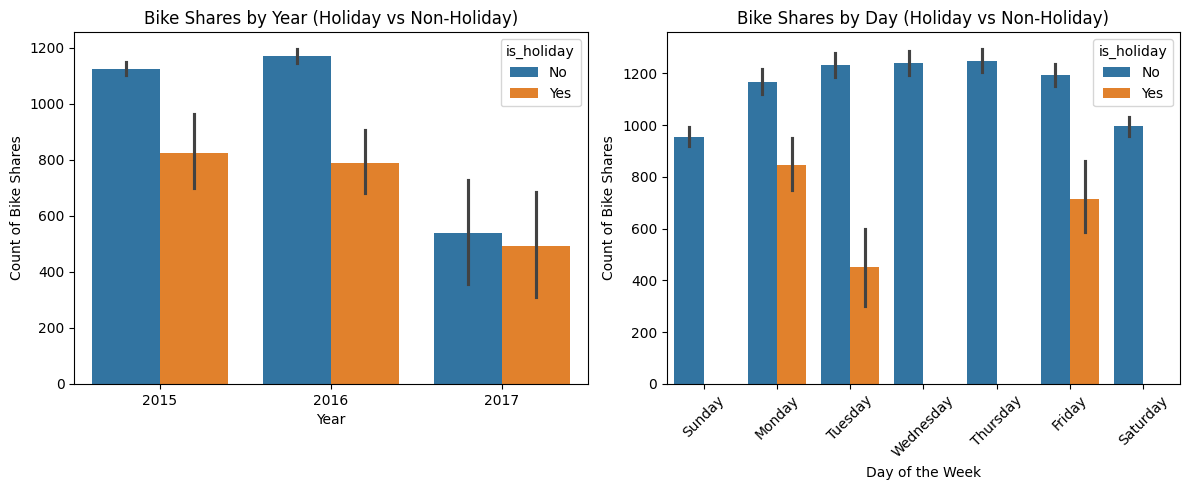

In [95]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5)) 


sns.barplot(x='Year', y='Count of bike shares', data=CleanDf, ax=axes[0], hue='is_holiday')
axes[0].set_title('Bike Shares by Year (Holiday vs Non-Holiday)')
axes[0].set_xlabel('Year')
axes[0].set_ylabel('Count of Bike Shares')
axes[0].tick_params(axis='x', rotation=0) 


sns.barplot(x='day_name', y='Count of bike shares', data=CleanDf, ax=axes[1], hue='is_holiday')
axes[1].set_title('Bike Shares by Day (Holiday vs Non-Holiday)')
axes[1].set_xlabel('Day of the Week')
axes[1].set_ylabel('Count of Bike Shares')
axes[1].tick_params(axis='x', rotation=45)  

plt.tight_layout() 
plt.show()


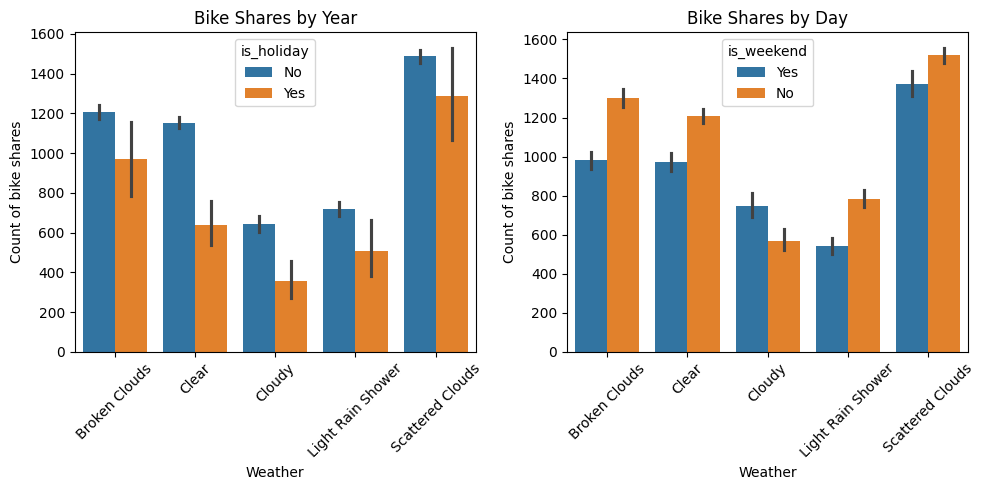

In [76]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Barplot 1: By Year
sns.barplot(x='weather_code', y='Count of bike shares', data=CleanDf, ax=axes[0], hue='is_holiday')
axes[0].set_title('Bike Shares by Year')
axes[0].set_xlabel('Weather')
axes[0].set_ylabel('Count of bike shares')
axes[0].tick_params(axis='x', rotation=45) 

# Barplot 2: By Day
sns.barplot(x='weather_code', y='Count of bike shares', data=CleanDf, ax=axes[1], hue='is_weekend')
axes[1].set_title('Bike Shares by Day')
axes[1].set_xlabel('Weather')
axes[1].set_ylabel('Count of bike shares')
axes[1].tick_params(axis='x', rotation=45)  

plt.tight_layout() 
plt.show()

<Axes: xlabel='season', ylabel='Count of bike shares'>

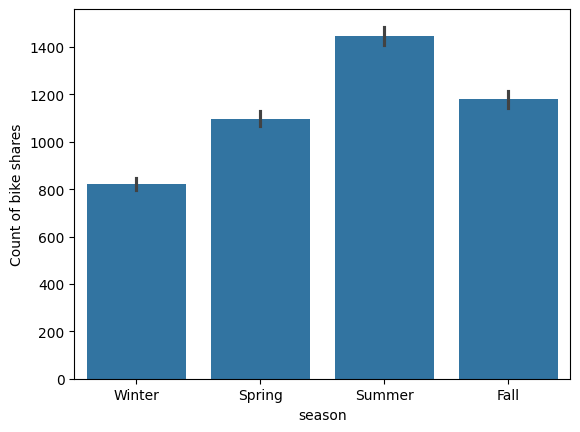

In [93]:
sns.barplot(data=CleanDf, x='season',  y="Count of bike shares")

In [105]:
Bike_Count_month =  CleanDf.groupby("month name")['Count of bike shares'].sum()
Bike_Count_month.sort_values(ascending=False)

month name
July         2200905
August       2137218
June         1948260
September    1884682
May          1833410
October      1790172
April        1561888
November     1347679
March        1309180
December     1240882
January      1136362
February     1102926
Name: Count of bike shares, dtype: int64

In [ ]:
most_humid_month = CleanDf.groupby('month name')['humidity'].mean().idxmax()
print("The most humid month is:", most_humid_month)

The most humid month is: December


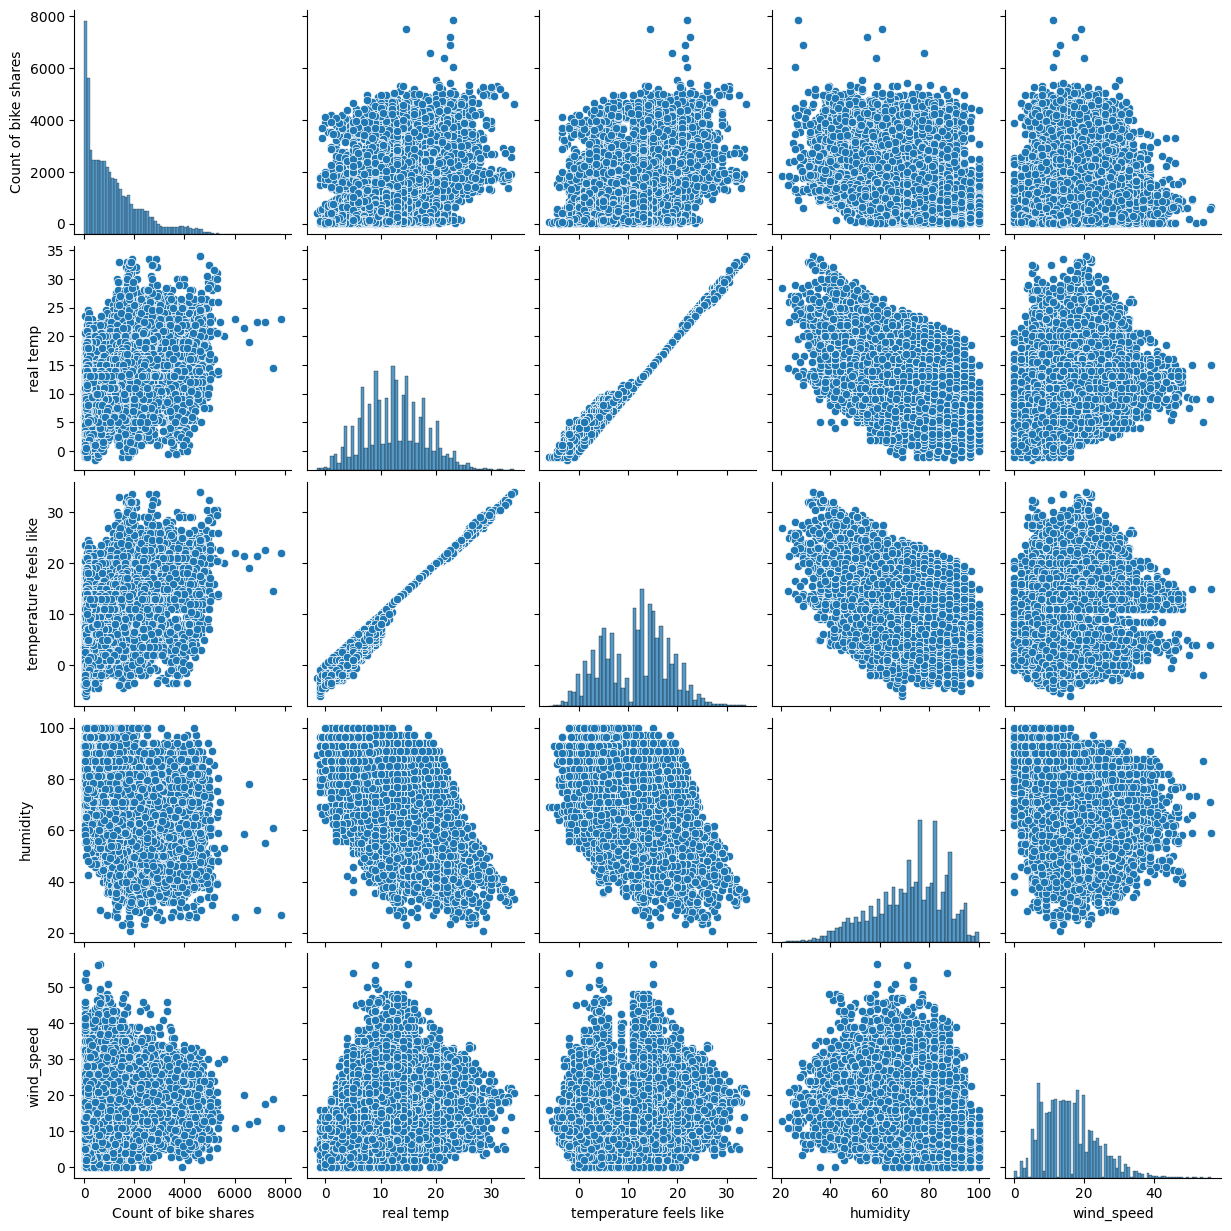

In [94]:
sns.pairplot(df)

End